In [1]:
import pandas as pd
import numpy as np

In [2]:
# import database
df = pd.read_csv('/Users/leon/My Drive/BU ABA/AD654/Assignment 1/lobster_23.csv')

# Q1
# A.

In [3]:
df.head()

,Date,weekday,high_temp,precip_total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo
0,2023-05-29,Mon,71,0.00,5448,9623,6028,39,9665,9,1,95.4,2042.83,193414.58,61.0,0
1,2023-05-30,Tue,66,0.00,3977,6462,2461,550,7368,2,6,93.3,1223.69,111946.06,76.0,0
2,2023-05-31,Wed,71,0.00,4634,5495,2825,1188,6991,3,3,86.6,1425.85,130465.64,92.0,0
3,2023-06-01,Thu,84,T,3012,10683,2379,1184,7803,4,4,90.8,976.80,105386.53,67.0,1
4,2023-06-02,Fri,85,0.09,5741,8932,4242,187,10173,7,3,86.2,1461.38,172071.35,93.0,0


# B.

There are 5 rows of dataset are available now.

# C.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 99 non-null     object 
 1   weekday              99 non-null     object 
 2   high_temp            99 non-null     int64  
 3   precip_total         99 non-null     object 
 4   unique_visitors      99 non-null     int64  
 5   gold_zone_rev        99 non-null     int64  
 6   park_merch_rev       99 non-null     int64  
 7   online_merch_rev     99 non-null     int64  
 8   lobsterama_rev       99 non-null     int64  
 9   lost_found_items     99 non-null     int64  
 10  first_aid_incidents  99 non-null     int64  
 11  operational_status   94 non-null     float64
 12  staff_hours          96 non-null     float64
 13  total_rev            99 non-null     float64
 14  sign_ups24           99 non-null     float64
 15  merch_promo          99 non-null     int64

There are 99 rows and 16 columns in total.

# D

Catagorical: Date, weekday, merch_promo

Numeric: high_temp, precip_total, unique_visitors, gold_zone_rev, park_merch_rev, online_merch_rev, lobsterama_rev, lost_found_items, first_aid_incidents, operational_status, staff_hours, total_rev, sign_ups24

# E.

a. The National Weather Service use ‘T’ to indicate "Thunderstorm".

b. Before deciding which value to replace "T", I firstly find out the count of each value

In [5]:
df['precip_total'].value_counts()

0.00    40
T       12
0.01     9
0.09     2
0.46     2
0.29     2
0.13     2
0.08     2
0.03     2
1.03     1
0.04     1
0.52     1
0.15     1
0        1
1.11     1
0.81     1
0.16     1
0.86     1
0.05     1
0.94     1
0.18     1
0.27     1
0.40     1
0.02     1
0.21     1
0.93     1
0.47     1
1.80     1
0.58     1
0.07     1
0.06     1
1.84     1
1.28     1
0.37     1
0.83     1
Name: precip_total, dtype: int64

It seems like 2 is a suitable value to replace for "T" since it is not used and will be the highest value.

In [6]:
df["precip_total"] = df["precip_total"].replace(to_replace = "T",value = 2)
df["precip_total"] = df["precip_total"].astype(float)
df['precip_total'].value_counts()

0.00    41
2.00    12
0.01     9
0.09     2
0.46     2
0.29     2
0.13     2
0.08     2
0.03     2
1.03     1
0.18     1
0.04     1
0.52     1
0.15     1
1.11     1
0.81     1
0.16     1
0.40     1
0.05     1
0.94     1
0.86     1
0.27     1
0.02     1
0.21     1
0.93     1
0.47     1
1.80     1
0.58     1
0.07     1
0.06     1
1.84     1
1.28     1
0.37     1
0.83     1
Name: precip_total, dtype: int64

# F.

a. 

Before replacing the value, I would like to check if there are any NA / mis-spelling value in "weekday".

In [7]:
df['weekday'].value_counts()

Mon    15
Tue    14
Wed    14
Thu    14
Fri    14
Sat    14
Sun    14
Name: weekday, dtype: int64

Looks safe to replace the value of "weekday" directly. I created a new column called "day_type" to identify the day is "weekday" or "weekend".

In [8]:
day_mapping = {"Mon": "weekday", 
               "Tue": "weekday", 
               "Wed": "weekday", 
               "Thu": "weekday", 
               "Fri": "weekend", 
               "Sat": "weekend", 
               "Sun": "weekend" }
df['day_type'] = df['weekday'].replace(to_replace=day_mapping)
df['day_type'].value_counts()

weekday    57
weekend    42
Name: day_type, dtype: int64

b.

I created a new column "is_very_rainy" and set the condition that the value would be "Y" if "precip_total" >= 1, while "N" if it's not.

In [9]:
df['is_very_rainy'] = 'N'
df.loc[df['precip_total']>=1,'is_very_rainy'] = "Y"
df['is_very_rainy'].value_counts()

N    82
Y    17
Name: is_very_rainy, dtype: int64

c. 

Reversing the value of "lost_found_items" and "first_aid_incidents".

In [10]:
df['lost_found_items'], df['first_aid_incidents'] = df['first_aid_incidents'], df['lost_found_items']
df.head()

,Date,weekday,high_temp,precip_total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo,day_type,is_very_rainy
0,2023-05-29,Mon,71,0.00,5448,9623,6028,39,9665,1,9,95.4,2042.83,193414.58,61.0,0,weekday,N
1,2023-05-30,Tue,66,0.00,3977,6462,2461,550,7368,6,2,93.3,1223.69,111946.06,76.0,0,weekday,N
2,2023-05-31,Wed,71,0.00,4634,5495,2825,1188,6991,3,3,86.6,1425.85,130465.64,92.0,0,weekday,N
3,2023-06-01,Thu,84,2.00,3012,10683,2379,1184,7803,4,4,90.8,976.80,105386.53,67.0,1,weekday,Y
4,2023-06-02,Fri,85,0.09,5741,8932,4242,187,10173,3,7,86.2,1461.38,172071.35,93.0,0,weekend,N


# G.

a. The total revenue is $13,347,279.58

In [11]:
round(df['total_rev'].sum(),2)

13347279.58

b.

In overall, the spending of Lobsterama is higher than park merchandise regardless of raining or not. For the spending of Lobsterama, it is higher in rainy, while for the spending of Park Merchandise is higher in not rainy day. This probably because people tend to stay indoor during rainy day and Lobsterama provides a perfect place to avoid the rain, while people needs to walk outdoor for merchandise purchase.

In [12]:
# Lobsterama Spending comparision
lobsterama_rev_rainy = df.loc[df['is_very_rainy'] == "Y",'lobsterama_rev'].sum()
lobsterama_rev_not_rainy = df.loc[df['is_very_rainy'] == "N",'lobsterama_rev'].sum()

# Park merchandise spending comparision
park_merch_rev_rainy = df.loc[df['is_very_rainy'] == "Y",'park_merch_rev'].sum()
park_merch_rev_not_rainy = df.loc[df['is_very_rainy'] == "N",'park_merch_rev'].sum()

comparision = {
    'rainy': [lobsterama_rev_rainy, park_merch_rev_rainy],       # Lobsterama Spending and Park Merchandise Spending on rainy days
    'not rainy': [lobsterama_rev_not_rainy, park_merch_rev_not_rainy]   # Lobsterama Spending and Park Merchandise Spending on non-rainy days
}

rainy_comparision = pd.DataFrame(comparision, index=['Lobsterama Spending', 'Park Merchandise Spending'])
rainy_comparision

,rainy,not rainy
Lobsterama Spending,113100,674468
Park Merchandise Spending,45523,303786


c.

Based on the plot and statistic below, we can see that there is a low coorelation (0.12) bwetween temparature and lost found items. Therefore, the director cannot say that people become more forgetful on hot days.

The coorelation between temperature and lost found items is: 0.08304029626399438


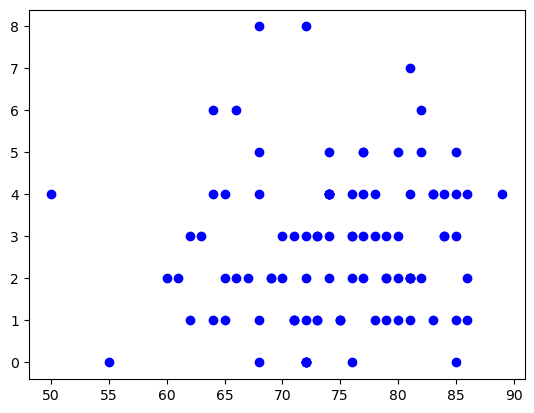

In [13]:
import matplotlib.pyplot as plt

scarplot = plt.scatter(df['high_temp'], df['lost_found_items'], label='Temparature v.s lost found items', color='blue', marker='o')
correlation = df['high_temp'].corr(df['lost_found_items'])
print(scarplot)
print(f'The coorelation between temperature and lost found items is: {correlation}')

# H.

In [14]:
# a.
gold_zone_sd = round(np.std(df['gold_zone_rev']),2)
park_sd = round(np.std(df['park_merch_rev']),2)

print(f'The standard deviation of Gold Zone revenue is {gold_zone_sd}, and that of daily park revenue is {park_sd}')

The standard deviation of Gold Zone revenue is 1968.51, and that of daily park revenue is 1206.66


b.

It is misleading to compare directly these two numbers because they are not follow the same measurement, therefore there might be differnet scale or outliers exist in these two datasets that affect the shape of distribution, makeing the comparision meaningless.

In [15]:
# c.
# i.
gold_zone_mean = round(np.mean(df['gold_zone_rev']),2)
gold_zone_cv = round((gold_zone_sd / gold_zone_mean)*100,2)

park_mean = round(np.mean(df['park_merch_rev']),2)
park_cv = round((park_sd / park_mean )*100,2)

print(f'The CV of Gold Zone revenue is {gold_zone_cv}, and that of daily park revenue is {park_cv}')

The CV of Gold Zone revenue is 24.75, and that of daily park revenue is 34.2


ii.

By using coefficient of variation (CV), we can get a measure of relative variability that can be used to compare the variation in datasets with different scales or units. In this example, the CV of daily park revenue is higher than Gold Zone revenue, indicating data points in the daily park revenue are more spread out from the mean compared to the Gold Zone revenu.

# I.

In [16]:
missing = df.isnull()
total_missing = missing.sum().sum()
missing_column = df.columns[missing.any()].tolist()

print(f'There are a total of {total_missing} values, and they are from columns of {missing_column}')

There are a total of 8 values, and they are from columns of ['operational_status', 'staff_hours']


a.

NAs might be meanful in 'operational status' because the facility might not work due to holiday, maintainance or closure. Likewise, the NAs in 'staff hours' might indicate that there was a holiday or close day for the Lobsterland.

# J.

In [17]:
# Rename column 'staff_hours' to 'working_hour'
df = df.rename(columns={'staff_hours' : 'working_hour'})
print(df.columns)

Index(['Date', 'weekday', 'high_temp', 'precip_total', 'unique_visitors',
       'gold_zone_rev', 'park_merch_rev', 'online_merch_rev', 'lobsterama_rev',
       'lost_found_items', 'first_aid_incidents', 'operational_status',
       'working_hour', 'total_rev', 'sign_ups24', 'merch_promo', 'day_type',
       'is_very_rainy'],
      dtype='object')


# II. Data Visualization

# K.

Text(0.5, 1.0, 'Histogram of Lobsterama Revenue')

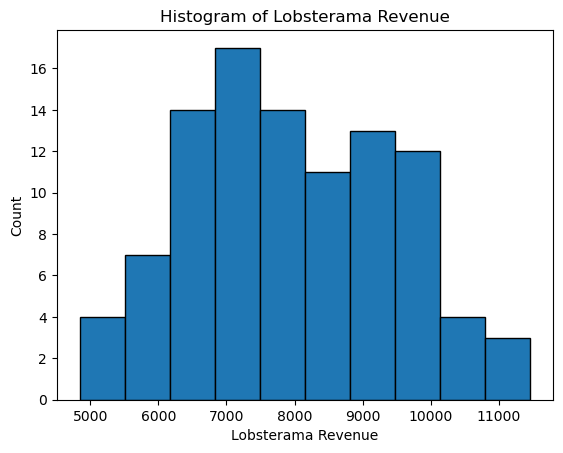

In [18]:
plt.hist(df['lobsterama_rev'], bins = 10, edgecolor='black')
plt.xlabel('Lobsterama Revenue')
plt.ylabel('Count')
plt.title('Histogram of Lobsterama Revenue')

a.

I noticed that most of the spending amounts are ranging from 6,000 to 10,000. Especially many revenue are in the range 6,500 to 7,500.

b.

With the higher bins, we can observe a more detailed distribution of Lobsterama Revenue. For example, we can see there are lots of revenue values in the range of 9,000 to 9,200 with a bin size of 30, instead of the range of 6,000 to 10,000 with a bin size of 10.

Text(0.5, 1.0, 'Histogram of Lobsterama Revenue')

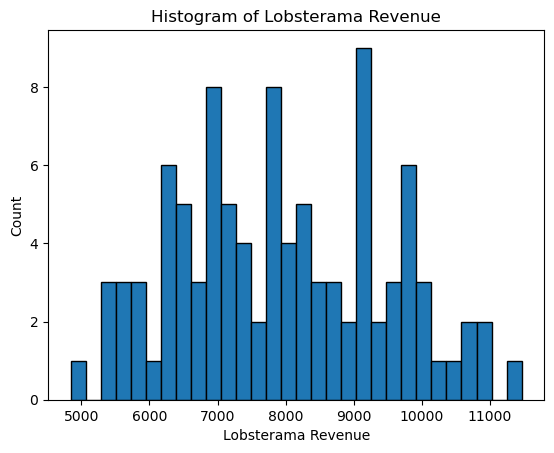

In [19]:
plt.hist(df['lobsterama_rev'], bins = 30, edgecolor='black')
plt.xlabel('Lobsterama Revenue')
plt.ylabel('Count')
plt.title('Histogram of Lobsterama Revenue')

c.

From the histogram below, we can observe a trend that there is higher spending during weekends. I expect this trend because people usually have more free time to go out, such as visiting Lobsterland, during the weekends, resulting in more revenue.

Text(0.5, 1.0, 'Histogram of Lobsterama Revenue')

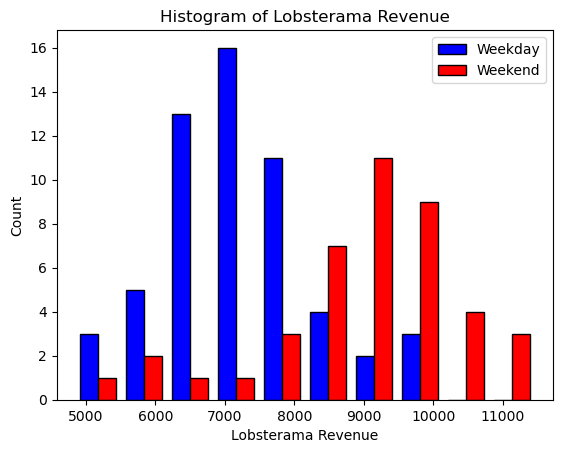

In [20]:
weekday = list(df[df['day_type'] == 'weekday']['lobsterama_rev'])
weekend = list(df[df['day_type'] == 'weekend']['lobsterama_rev'])

plt.hist([weekday,weekend],
         stacked=False, color=['blue', 'red'], edgecolor='black')


# Add labels and a legend
plt.xlabel('Lobsterama Revenue')
plt.ylabel('Count')
plt.legend(['Weekday', 'Weekend'])
plt.title('Histogram of Lobsterama Revenue')

# L.

a.

This beeswarm plot shows me the distribution of unique visitors for each weekday. There are more unique visitors during the weekends. Similar to the reason from my previous answer, this trend occurs because people usually have more free time to visit Lobsterland during the weekends, resulting in more unique visitors.

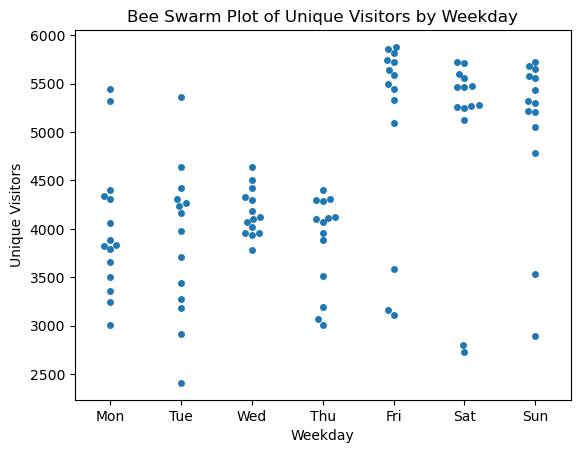

In [21]:
import seaborn as sns
sns.swarmplot(x='weekday', y='unique_visitors', data=df)
# Add labels and a title
plt.xlabel('Weekday')
plt.ylabel('Unique Visitors')
plt.title('Bee Swarm Plot of Unique Visitors by Weekday')
plt.show()

b.

The common reason why these three days have unusually high unique visitors on weekday is the holiday. For example, 5/29 is Memorial Day, 7/4 is Independence Day, and 9/4 is Labor Day.

In [22]:
rare_unique_visitor = df[(df['unique_visitors'] > 5000) & (df['weekday'].isin(['Mon', 'Tue']))]
rare_unique_visitor

,Date,weekday,high_temp,precip_total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,working_hour,total_rev,sign_ups24,merch_promo,day_type,is_very_rainy
0,2023-05-29,Mon,71,0.00,5448,9623,6028,39,9665,1,9,95.4,2042.83,193414.58,61.0,0,weekday,N
36,2023-07-04,Tue,76,0.27,5357,9057,5176,1059,9839,0,5,96.7,2052.36,194360.43,83.0,0,weekday,N
98,2023-09-04,Mon,81,0.00,5315,8623,5490,640,9718,2,2,90.0,1924.81,182146.72,180.6,0,weekday,N


# M.

The number of visitors cannot predict the number of first aid incidents, because from the scatter plot below we can see that there is no obvious correlation between these two variables. I think this might be because it is difficult to get injured, so the incidents will not occur more even if more people visit.

The coorelation between Visitors and first aid incidents is: 0.2607228354108642


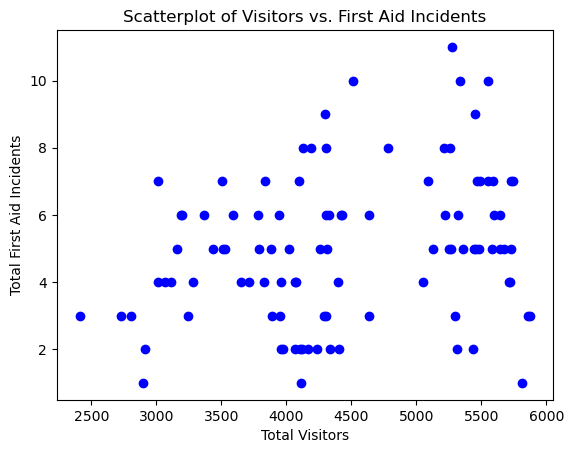

In [23]:
scarplot_m = plt.scatter(df['unique_visitors'], df['first_aid_incidents'], label='Visitors v.s first aid incidents', color='blue', marker='o')
correlation_m = df['unique_visitors'].corr(df['first_aid_incidents'])
plt.xlabel('Total Visitors')
plt.ylabel('Total First Aid Incidents')
plt.title('Scatterplot of Visitors vs. First Aid Incidents')
print(scarplot_m)
print(f'The coorelation between Visitors and first aid incidents is: {correlation_m}')

# N.

From the boxplot above, we can see the range of gold zone revenue during not-rainy days is larger than rainy days, while the median and most of the revenue on rainy days is higher than on not-rainy days. This might be because people tend to stay and shop longer during rainy days.

Text(0.5, 1.0, 'Boxplot of Gold Zone Revenue by is_very_rainy')

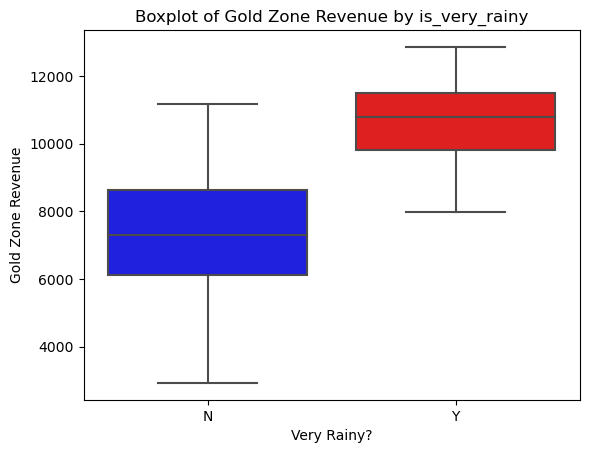

In [24]:
df3 = df[['gold_zone_rev', 'is_very_rainy']]
custom_palette = {'Y': 'red', 'N': 'blue'}
sns.boxplot(x='is_very_rainy', y='gold_zone_rev', data=df3, palette=custom_palette)
plt.xlabel('Very Rainy?')
plt.ylabel('Gold Zone Revenue')
plt.title('Boxplot of Gold Zone Revenue by is_very_rainy')

# O.

From the bosplot below, we can see that the average park merchaindise revenue is a little bit higher with promotion. It is interesting to see how people are willing to buy more with promotion since the price is higher without promotion, while in this case the average revenue with promotion is even higher.

Text(0.5, 1.0, 'Comparison of Park Merchandise Revenue with vs. Promotion')

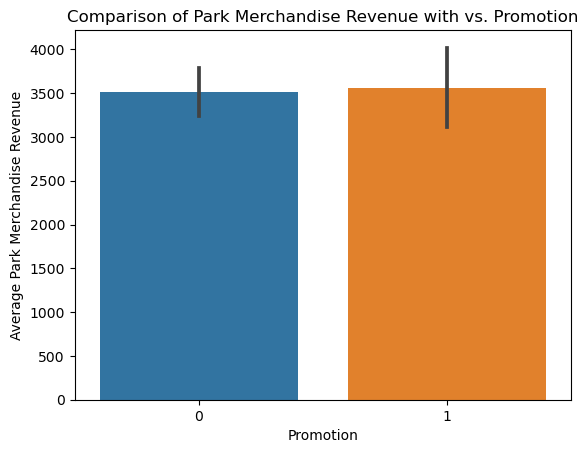

In [25]:
df4 = df[['park_merch_rev', 'merch_promo']]
sns.barplot(x='merch_promo', y='park_merch_rev', data=df4)
plt.xlabel('Promotion')
plt.ylabel('Average Park Merchandise Revenue')
plt.title('Comparison of Park Merchandise Revenue with vs. Promotion')


# P.

From the line plot below, we can see that the number of 2024 pass signups increased rapidly in September. This might be due to the approaching deadline for pass registration, so many people likely decided to purchase the pass to avoid missing the deadline.

<Axes: xlabel='Date', ylabel='sign_ups24'>

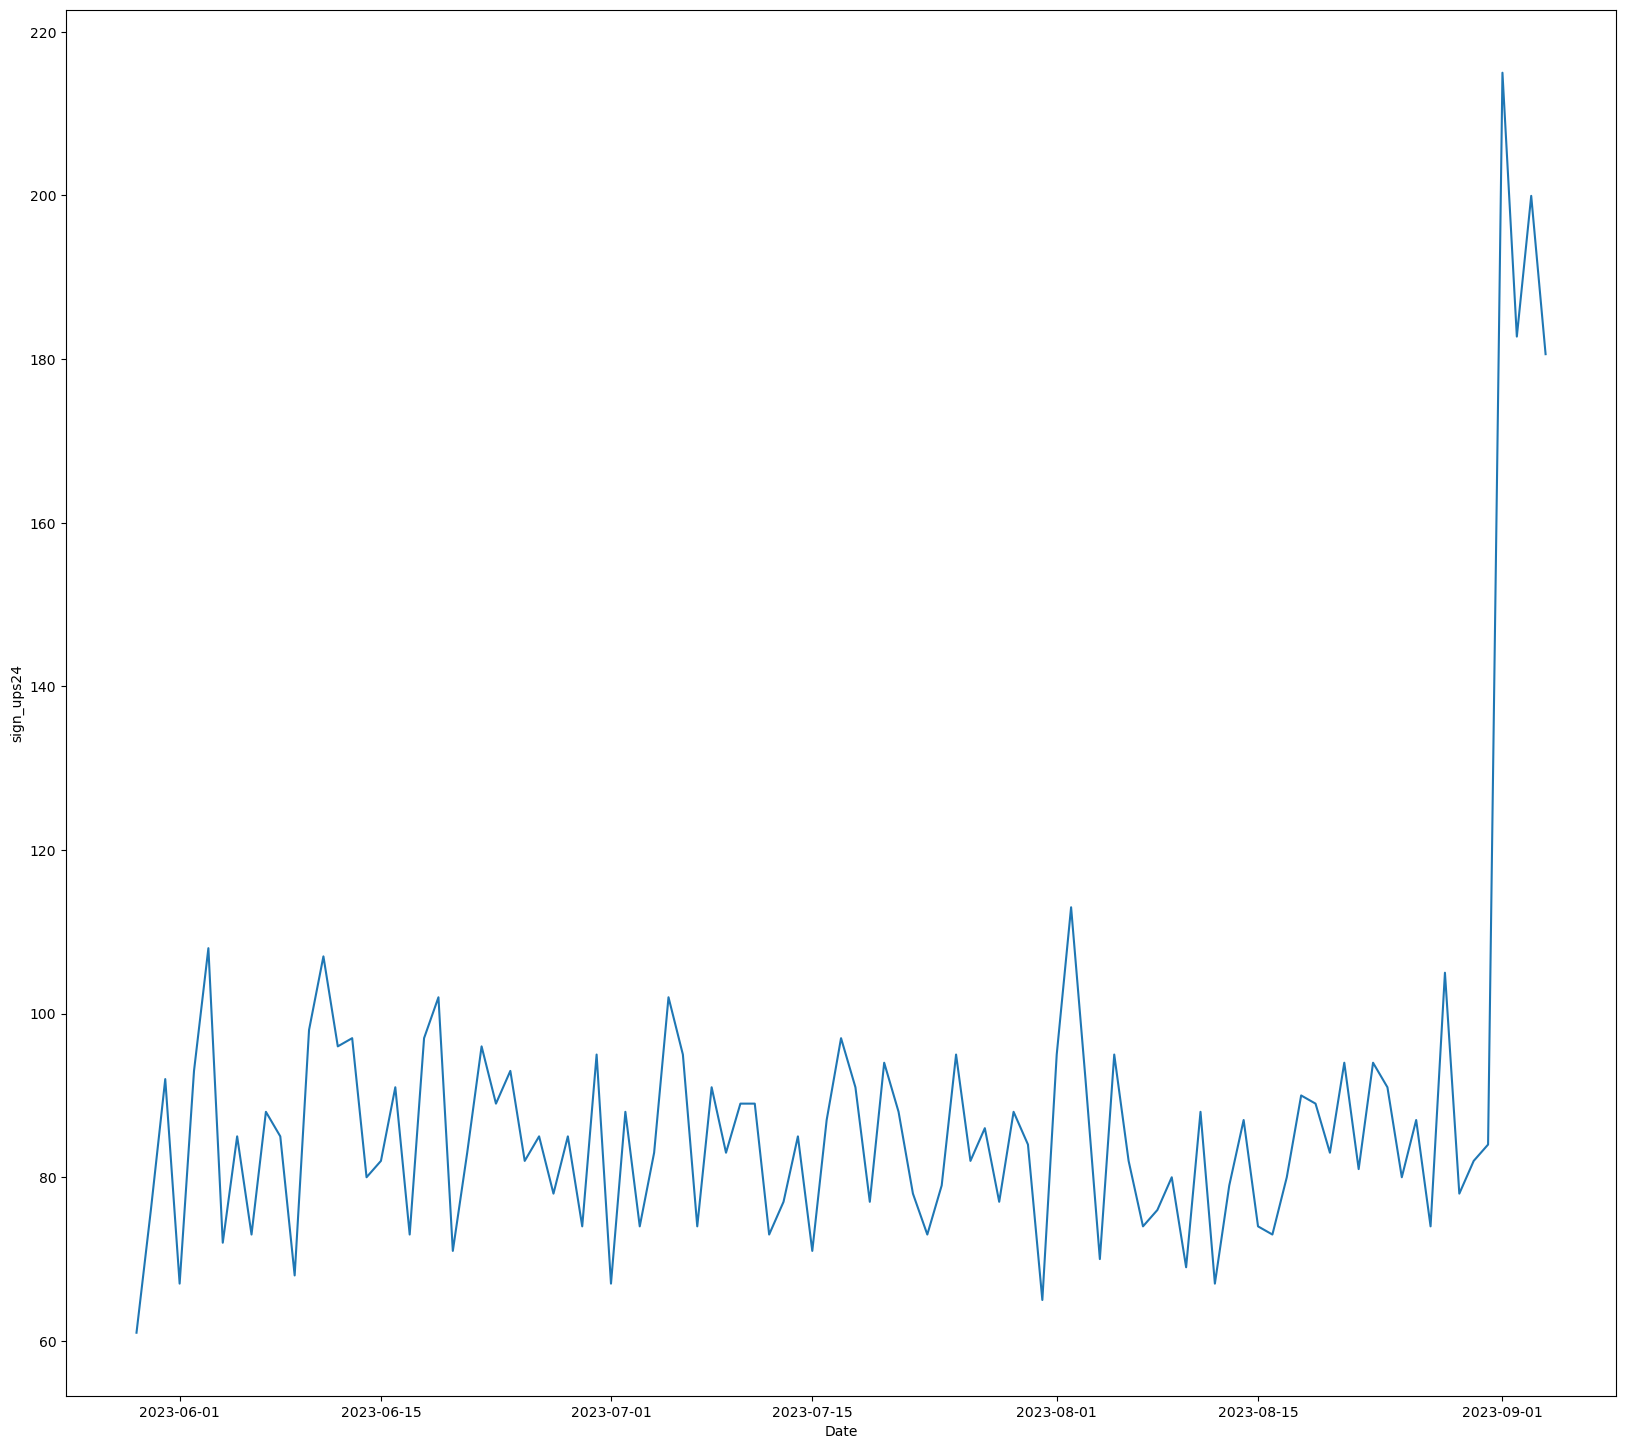

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(20, 18))
sns.lineplot(data=df, x="Date", y="sign_ups24")

# Part III.

I chose to record my daily spending from 9/20 - 9/22.

On 9/20, the total spend is 210.82: Grocery 136.25, Food / Beverage 26.42, Transportation 48.15.  
On 9/21, the total spend is 41.82: Food / Beverage 5.99, Transportation 17.82, Entertainment 18.  
On 9/21, the total spend is 62.2: Food / Beverage 5.4, Transportation 18.82, Entertainment 37.98.

After spending a large amount on groceries on the first day, I realized that I needed to control my budget better in the following days. So I limited my dining out and brought food from the grocery I bought. The transportation costs also reminded me that I needed to cut back. I live far from downtown Boston, so I usually take Uber instead of the subway to avoid the 1.5 hour commute. This means I need to lower spending in other categories to compensate and maintain a steady daily budget.

I took this record to my sister, who was also a graduate student in Boston before, and asked for recommendations. She gave me a useful tip: time management. If I know I'm going downtown, I should leave home earlier and take the subway to save on transportation costs. She noted that there's a higher possibility of extra entertainment spending anytime I'm not staying at home.